<a href="https://colab.research.google.com/github/bhatia-pooja/Sticks-Kebob-Case-Study/blob/main/Segment_Profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Creating Environment
Uploading Dataset

---



In [2]:
from google.colab import drive
import os

drive.mount("drive")

Mounted at drive


In [3]:
os.chdir('drive/MyDrive/MGT 251_Marketing Analytics')
print(drive)
print(os.getcwd())

<module 'google.colab.drive' from '/usr/local/lib/python3.10/dist-packages/google/colab/drive.py'>
/content/drive/MyDrive/MGT 251_Marketing Analytics


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_excel('stickskebob.xlsx')
data.head()

,Obs,Customer,planner,spender,local,healthy,Segment
0,2,0,1,2,3.0,2,1.0
1,3,0,1,3,3.0,2,1.0
2,4,0,2,4,3.0,2,2.0
3,5,0,2,4,1.0,2,5.0
4,10,0,2,4,2.0,3,2.0


## **HIERARCHICAL CLUSTER ANALYSIS**
on all surveyors


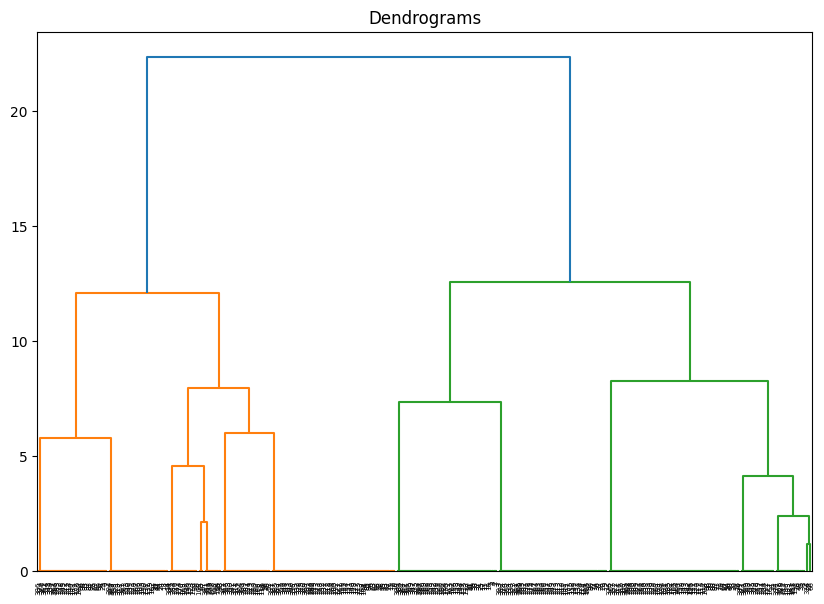

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
data2=np.array(data)
data3=data2[:,2:4]
dend = shc.dendrogram(shc.linkage(data3, method='ward', metric='euclidean'))

Based on the above dendrograms, it can be infered that the survoyers can be divided into two distinct segments.

---



Creating Customer Segment Profiles

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data3)
df=pd.DataFrame(data)
membership=cluster.fit_predict(data3)
df['membership'] = membership
print(df)

     Obs  Customer  planner  spender  local  healthy  Segment  membership
0      2         0        1        2    3.0        2      1.0           1
1      3         0        1        3    3.0        2      1.0           1
2      4         0        2        4    3.0        2      2.0           0
3      5         0        2        4    1.0        2      5.0           0
4     10         0        2        4    2.0        3      2.0           0
..   ...       ...      ...      ...    ...      ...      ...         ...
390  478         1        3        3    2.0        2      3.0           0
391  479         1        2        2    2.0        2      4.0           1
392  480         1        1        4    1.0        2      2.0           0
393  481         1        1        4    1.0        1      3.0           0
394  482         1        1        3    2.0        2      3.0           1

[395 rows x 8 columns]


             planner   spender     local   healthy
membership                                        
0           1.924528  3.599057  1.933649  1.825472
1           1.704918  2.021858  1.846154  1.814208


<Axes: >

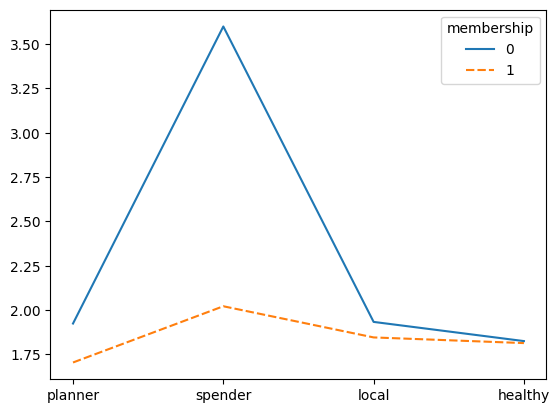

In [17]:
data_mean=df.groupby(df['membership'])[['planner','spender','local','healthy']].mean()
print(data_mean)
data_mean_transposed = data_mean.T
import seaborn as sns
sns.lineplot(data=data_mean_transposed)

## **HIERARCHICAL CLUSTER ANALYSIS**
on non-customers

In [18]:
filtered_data = data[data["Customer"] == 0]
filtered_data

,Obs,Customer,planner,spender,local,healthy,Segment
0,2,0,1,2,3.0,2,1.0
1,3,0,1,3,3.0,2,1.0
2,4,0,2,4,3.0,2,2.0
3,5,0,2,4,1.0,2,5.0
4,10,0,2,4,2.0,3,2.0
...,...,...,...,...,...,...,...
185,258,0,2,3,3.0,3,1.0
186,260,0,2,4,2.0,2,2.0
187,261,0,1,2,1.0,1,5.0
188,264,0,2,3,3.0,2,1.0


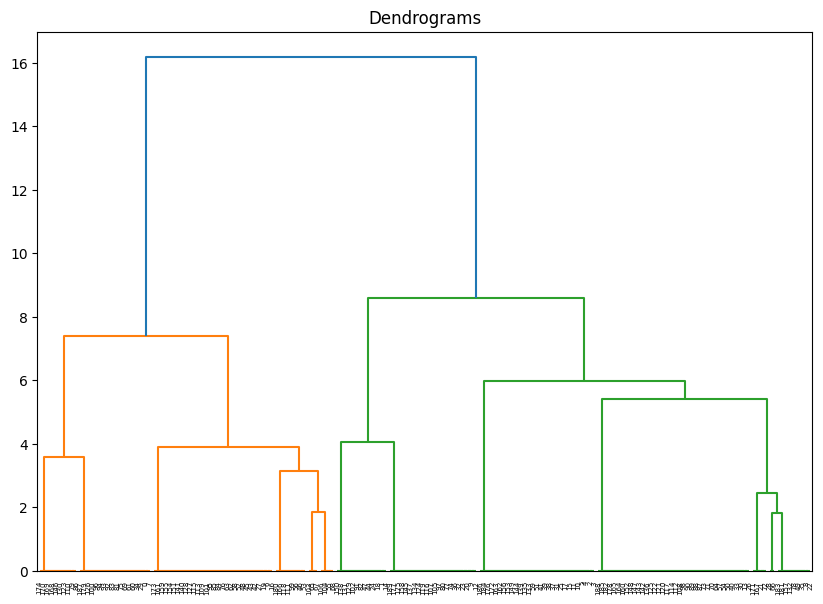

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
data4 = np.array(filtered_data)
data5 = data4[:, 2:4]
dend = shc.dendrogram(shc.linkage(data5, method='ward', metric='euclidean'))

Based on the above dendrograms, it can be infered that the non-customers can be divided into two distinct segments.


In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data5)
df=pd.DataFrame(filtered_data)
membership=cluster.fit_predict(data5)
df['membership'] = membership
print(df)

     Obs  Customer  planner  spender  local  healthy  Segment  membership
0      2         0        1        2    3.0        2      1.0           1
1      3         0        1        3    3.0        2      1.0           0
2      4         0        2        4    3.0        2      2.0           0
3      5         0        2        4    1.0        2      5.0           0
4     10         0        2        4    2.0        3      2.0           0
..   ...       ...      ...      ...    ...      ...      ...         ...
185  258         0        2        3    3.0        3      1.0           0
186  260         0        2        4    2.0        2      2.0           0
187  261         0        1        2    1.0        1      5.0           1
188  264         0        2        3    3.0        2      1.0           0
189  265         0        1        4    1.0        1      3.0           0

[190 rows x 8 columns]


             planner   spender     local   healthy
membership                                        
0           1.846154  3.470085  2.051724  2.000000
1           1.767123  1.767123  2.041096  2.027397


<Axes: >

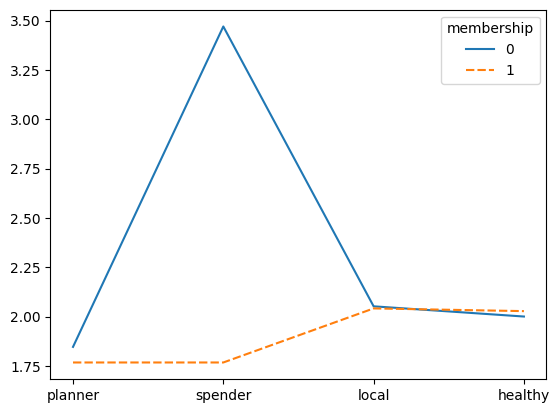

In [21]:
data_mean=df.groupby(df['membership'])[['planner','spender','local','healthy']].mean()
print(data_mean)
data_mean_transposed = data_mean.T
import seaborn as sns
sns.lineplot(data=data_mean_transposed)

## **HIERARCHICAL CLUSTER ANALYSIS**
on customers

In [22]:
filtered_data_c = data[data["Customer"] == 1]
filtered_data_c

,Obs,Customer,planner,spender,local,healthy,Segment
190,266,1,1,2,1.0,1,5.0
191,267,1,2,3,2.0,2,2.0
192,268,1,2,2,2.0,2,4.0
193,269,1,3,3,2.0,1,3.0
194,270,1,2,3,1.0,1,2.0
...,...,...,...,...,...,...,...
390,478,1,3,3,2.0,2,3.0
391,479,1,2,2,2.0,2,4.0
392,480,1,1,4,1.0,2,2.0
393,481,1,1,4,1.0,1,3.0


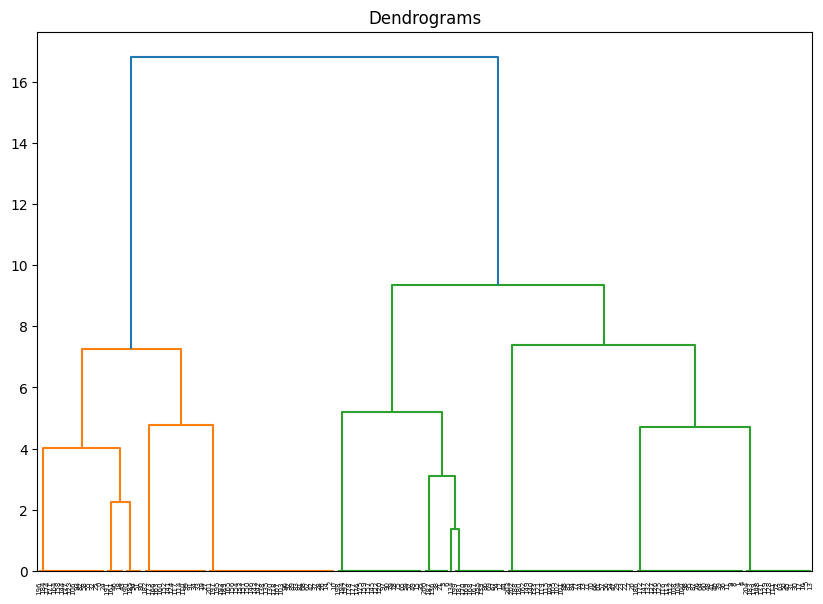

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
data4 = np.array(filtered_data_c)
data5 = data4[:, 2:4]
dend = shc.dendrogram(shc.linkage(data5, method='ward', metric='euclidean'))

Based on the above dendrograms, it can be infered that the customers can be divided into two distinct segments.


In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data5)
df=pd.DataFrame(filtered_data_c)
membership=cluster.fit_predict(data5)
df['membership'] = membership
print(df)

     Obs  Customer  planner  spender  local  healthy  Segment  membership
190  266         1        1        2    1.0        1      5.0           1
191  267         1        2        3    2.0        2      2.0           0
192  268         1        2        2    2.0        2      4.0           1
193  269         1        3        3    2.0        1      3.0           0
194  270         1        2        3    1.0        1      2.0           0
..   ...       ...      ...      ...    ...      ...      ...         ...
390  478         1        3        3    2.0        2      3.0           0
391  479         1        2        2    2.0        2      4.0           1
392  480         1        1        4    1.0        2      2.0           0
393  481         1        1        4    1.0        1      3.0           0
394  482         1        1        3    2.0        2      3.0           0

[205 rows x 8 columns]


             planner   spender     local   healthy
membership                                        
0           1.769841  3.571429  1.801587  1.603175
1           1.924051  1.873418  1.666667  1.708861


<Axes: >

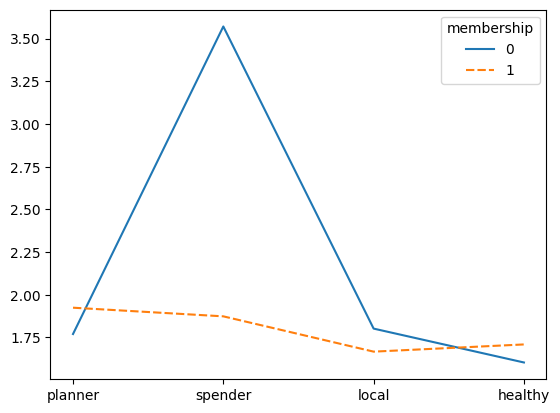

In [25]:
data_mean=df.groupby(df['membership'])[['planner','spender','local','healthy']].mean()
print(data_mean)
data_mean_transposed = data_mean.T
import seaborn as sns
sns.lineplot(data=data_mean_transposed)